Ch3 p38

Repeat p37, but use end conditions 3 and 4. Plot these points and compare to the polot from end condition 1. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from naf.incf import csisv

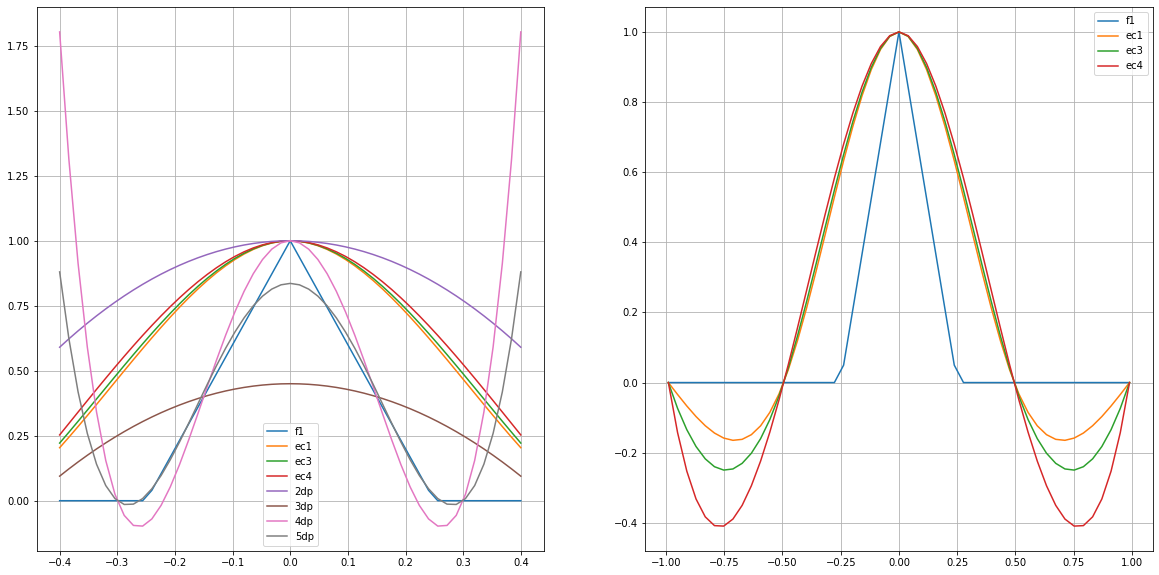

In [5]:
def f1(x):
    if x > -1 and x < -0.25:
        return 0
    if x > -0.25 and x < 0.25:
        return 1 - abs(4*x)
    if x > 0.25 and x < 1:
        return 0

#generating 5 points to match from original equation
x = np.linspace(-0.99, 0.99, 5)
f1y = [f1(i) for i in x]

#range of values for plotting subsequent curves
ivx = np.linspace(-0.40, 0.40, 51)
ivx2 = np.linspace(-0.99, 0.99, 51)

#computing original equation values
f1y2 = [f1(i) for i in ivx]
f1y3 = [f1(i) for i in ivx2]

#computing cubic spline interpolated values
pts = np.column_stack((x,f1y))
ec1_1 = csisv(ivx, pts, 1)
ec1_2 = csisv(ivx2, pts, 1)
ec3_1 = csisv(ivx, pts, 3)
ec3_2 = csisv(ivx2, pts, 3)
ec4_1 = csisv(ivx, pts, 4)
ec4_2 = csisv(ivx2, pts, 4)

#computing 2nd deg polynomial values, equation taken from p33
eq2 = lambda z: 1.0 - 2.56*z**2
veq2 = np.vectorize(eq2)
y2 = veq2(ivx)

#computing 3rd deg polynomial values, equation taken from p33
eq3 = lambda z: -2.22222222222222*z**2 + 2.22044604925031e-16*z + 0.45
veq3 = np.vectorize(eq3)
y3 = veq3(ivx)

#computing 4th deg polynomial values, equation taken from p33
eq4 = lambda z: 230.452674897119*z**4 - 31.8518518518519*z**2 - 4.44089209850063e-16*z + 1.0
veq4 = np.vectorize(eq4)
y4 = veq4(ivx)

#computing 5th deg polynomial values, equation taken from p33
eq5 = lambda z: 136.638374485597*z**4 - 21.5856481481482*z**2 - 4.44089209850063e-16*z + 0.8359375
veq5 = np.vectorize(eq5)
y5 = veq5(ivx)


fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].grid()
ax[0].plot(ivx, f1y2, label="f1")
ax[0].plot(ivx, ec1_1, label="ec1")
ax[0].plot(ivx, ec3_1, label="ec3")
ax[0].plot(ivx, ec4_1, label="ec4")
ax[0].plot(ivx, y2, label="2dp")
ax[0].plot(ivx, y3, label="3dp")
ax[0].plot(ivx, y4, label="4dp")
ax[0].plot(ivx, y5, label="5dp")
ax[0].legend()

ax[1].grid()
ax[1].plot(ivx2, f1y3, label="f1")
ax[1].plot(ivx2, ec1_2, label="ec1")
ax[1].plot(ivx2, ec3_2, label="ec3")
ax[1].plot(ivx2, ec4_2, label="ec4")
ax[1].legend()
plt.show()

Comparing end condition 1 (ec1) to end condition 3 (ec3) and end condition 4 (ec4) we can see that ec1 most closely matches the original function. Due to the additional curvature in ec3 which approaches a parabola near the end and ec4 which approaches a cubic near the end. Therefore, for matching this function a cubic spline which attempts to approach linearity near the ends is the best fit. 